# Final assigment Supervised Learning

## Frame the problem
Dysphonic disorders can arise from several pathological processes. In parkinsons diseases dysphonia occurs often (70%) due to the affect of the basal ganglia on the laryngeal muscles. Dysphonia massively impacts the quality of life. 

Parkinsons diseases is caused by the cell death of melanin-containing dopaminergic neurons. These neurons are mainly found in the substantia nigra (brain region in the central brain, between brain stem and bridge). The cell death of the dopaminergic neurons leads to dysfunction of basal ganglia and reduced inhibition of dopaminergic controlled processes (e.g. regulation of laryngeal tension, conotrol of movement muscles). Currently, Parkinsons diseases is diagnosed through the appearance of the trias of symptoms rigidity, tremor and bradykinesia (slowness of movements) and verified by detecting the cell atrophy in the substantia nigra through MRI scanning. 

Since MRI scanning is an expensive diagnosis technique, alternative approaches are desirable. The previously mentioned dysphonia, arising from the altered laryngeal regulation is measurable via voice recordings. Here, we aim to build a model, which can classify subjects based on voice recordings (and the related features) into Healthy subjects and parkinson patients. Using voice recordings for diagnostics could simplify the diagnosis in several ways:
- every GP can make recordings and providing GPs with the model wrapped in a user-friendly software, every GP has a tool to support Parkinson diagnostics 
- patients could be sent to radiology centers prioritized based on the voice recording classification

For the chosen project, a labeled dataset is available (see data source and paper here), which makes it a supervised learning problem. The model will be trained and launched as batch learning model.  The quality of the model will be assessed using ....

Accuracy should be: 
Sensitivity should be:
Specificity should be: 

It is more acceptable to have false positive classifications (can be detected when conducting MRI scanning)  than false negative classificiations (the earlier the diagnosis the better the prognosis).

Assumptions:

## Get the Data
In this section the data will be load as pandas dataframe, checks for data types will be conducted.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('final_assignment/parkinsons.data')

In [6]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

There are 195 observations of 23 variables. The name variable contains a sjubject id with session number. The status variable identifies whether a subject was diagnosed with parkinsons diseases at the recording time (stauts == 1).The other variables are numerical results of voice recordings. 

## Inspect and explore the Data
In this section the variables will be studied. The target attribute is the status variable, which indicates whether a subject is diagnosed with parkinson (1) or not (0). Correlations will be studied. Identify necessary transformations

In [16]:
#check for missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

The data set does not contain missing values.

In [17]:
# get 5 number summary of all numerical variables
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<AxesSubplot:title={'center':'Distribution of Parkinson disease (1) versus Healthy (0)'}>

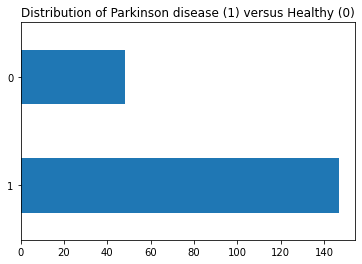

In [14]:
# observe the target variable
df.status.value_counts().plot(title = 'Distribution of Parkinson disease (1) versus Healthy (0)', 
                              kind='barh')

In [37]:
# distribution percentage
df.status.value_counts()/df.shape[0]

1    0.753846
0    0.246154
Name: status, dtype: float64

The outcome variable is very skewed towards the parkinson class. A model, which would always predict the bigger class (Parkinson disease) would be correct in about 75% of all cases. A balancing of groups seems to be necessary. Splitting the dataset into training and test set could contain nearby no data from the group 0 under unfortunate circumstances.  

Explore the relationship of the features to make a selection (21 features are way too many dimensions). There are several blocks of similar feature measurements: several measures for the fundamental frequency

<AxesSubplot:>

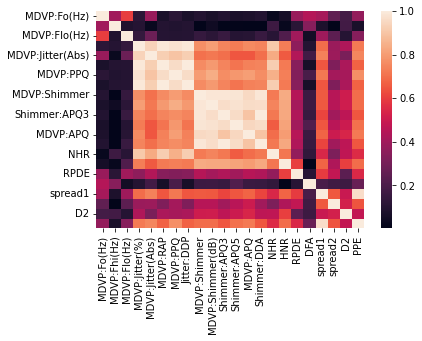

In [47]:
# initial correlation matrix
c = df.loc[ : , df.columns != 'status'].corr().abs()
sns.heatmap(c)

The fundamental frequency features seem to have no correlation to any other feature as well not among each other. There are clusters of correlation visible for the jitter realted features, Shimmer related features as well as for soread1 and PPE. The related groups are onserved in more detail in the following using pairplots [https://www.pluralsight.com/guides/finding-relationships-data-with-python].

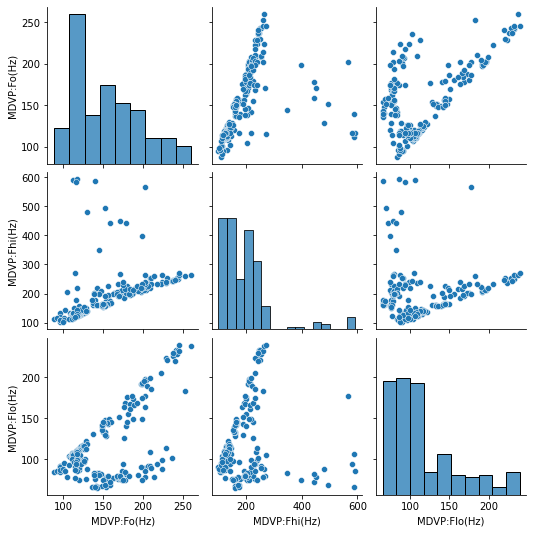

In [30]:
# measures of fundamental frequency
sns.pairplot(df.iloc[:, 1:4], kind="scatter")
plt.show()

The three fundamental frequency measures show common patterns, which makes sense, because they are containing partitions of the same information. However because of partitioning only some parts of the data points follow the shared pattern. The minimal fundamental frequency (Flo) is skewed to the left. The maximal fundamental frequency scatters around 200 Hertz and has some outliers up to 600 Hertz. The average vocal frequency is more balanced in its distribution with a strong tendency to 120 Hz, which is for males fairly common range. [https://en.wikipedia.org/wiki/Voice_frequency]

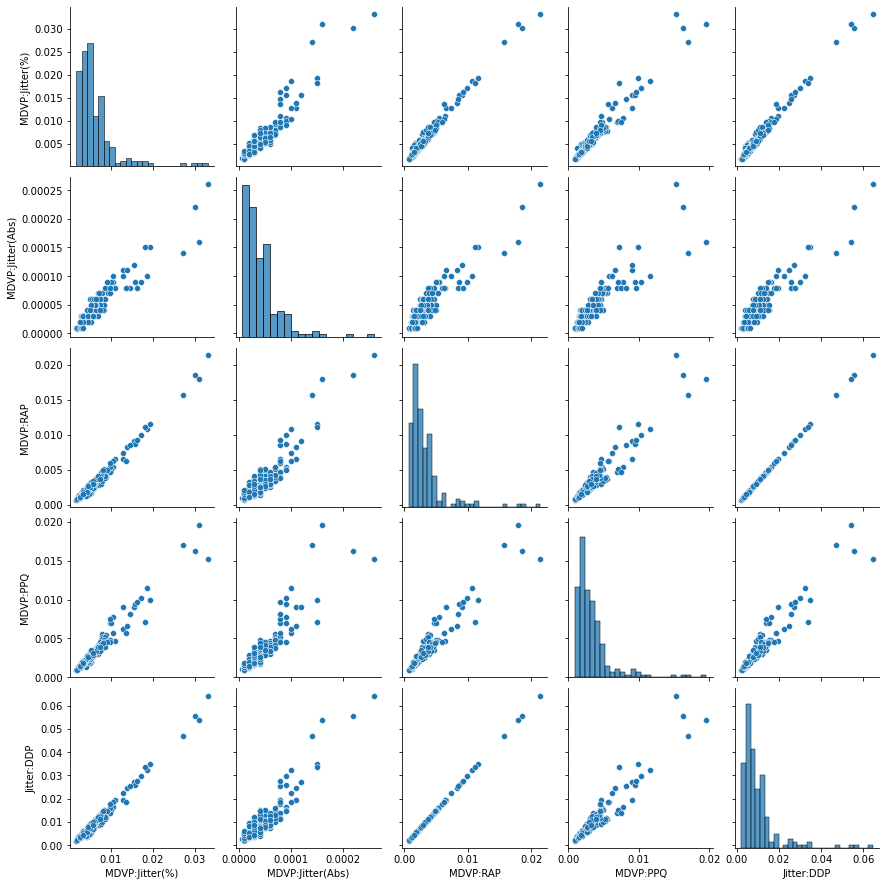

In [40]:
# measures of variation in fundamental frequency
sns.pairplot(df.iloc[:, 4:9], kind="scatter")
plt.show()

Linear correlation between all of the features in this category. Based on the heatmap the absolute jitter is the least correlated, this is why I will select this feature and discard the other features. the jitter is skewed towards very small values which makes sense because this is what characterizes jitter.

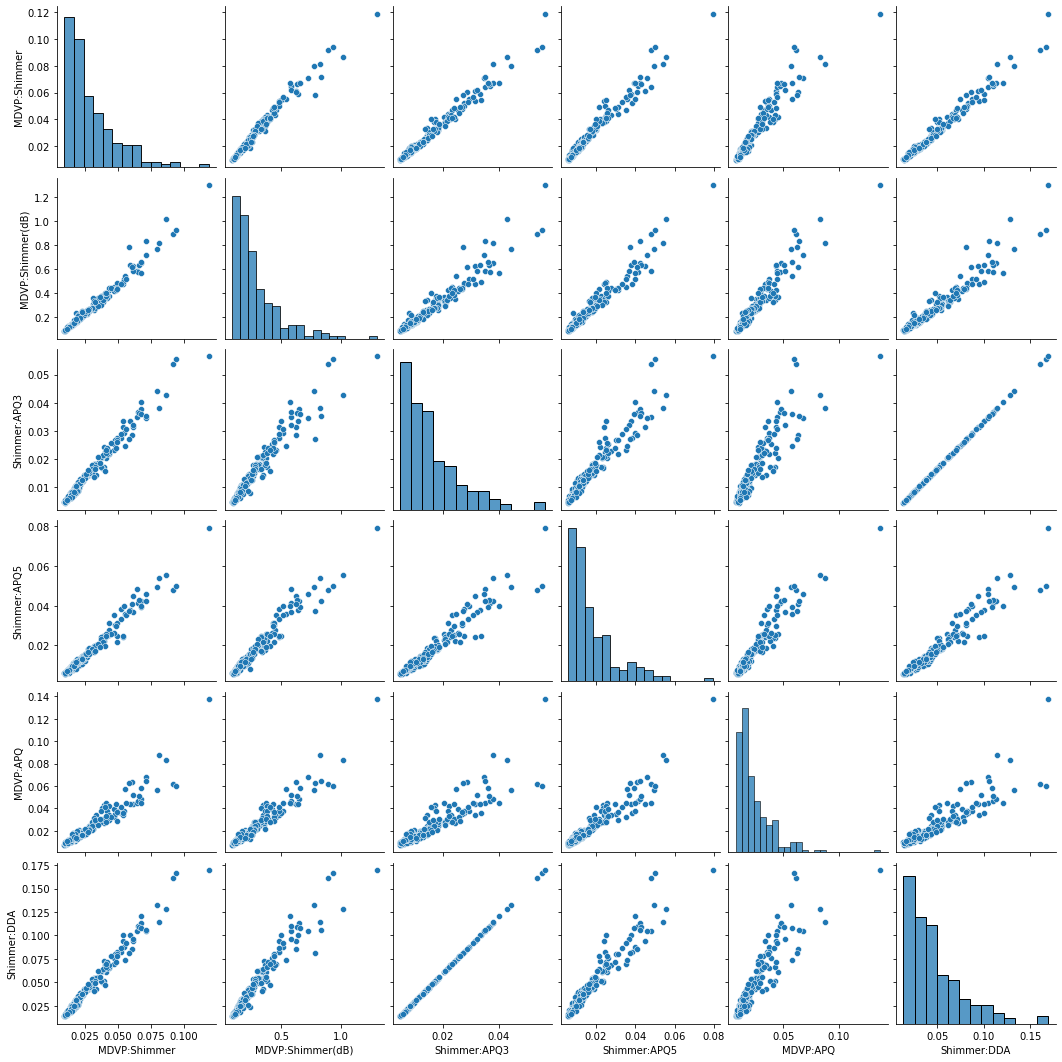

In [42]:
# Shimmer related features
sns.pairplot(df.iloc[:, 9:15], kind="scatter")
plt.show()

Linear relationship is seen for all of the shimmer related features. The data distribution looks quite similar as well. Similar as for the jittering, the Shimmer APQ is selected due to being the feature with the smallest correlation compared to the others.

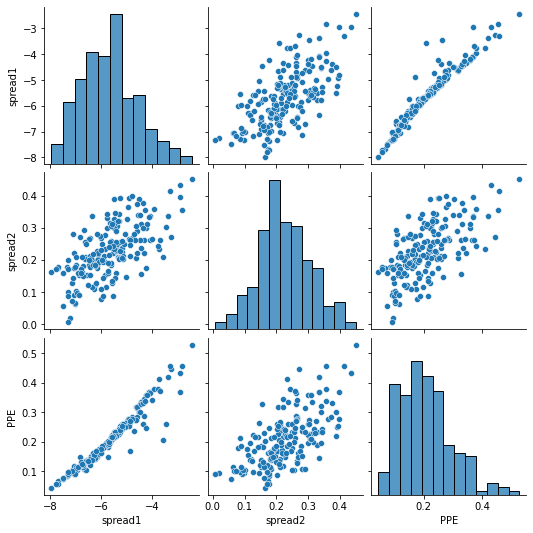

In [51]:
# remaining features with higher correlation
df_rem = df[['spread1', 'spread2', 'PPE']]
sns.pairplot(df_rem, kind="scatter")
plt.show()

NHR and HNR are similar measures. Since HNR is less correlated it is selected. RPDE and D2 are both not correlated and are therefore both selected. The two features are linearly realted as well. Spread1, spread2 and PPE form a category, spread2 is selected because of the lower correlation and less skewed distribution.

<AxesSubplot:>

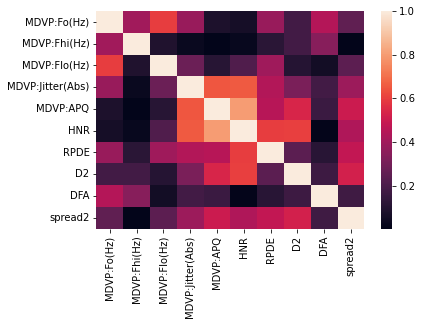

In [56]:
# leaner correlation matrix after selecting only a few features
df_selection = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:APQ', 'HNR', 'RPDE', 'D2', 'DFA', 'spread2']]
c = df_selection.corr().abs()
sns.heatmap(c)

The shimmer and HNR are still quite correlated. The shimmer describes the amplitude variations, the HNR measures the ration of noise to tonal components in the voice. Based on the described characteristics [https://www.gbmc.org/workfiles/mjdance/voice/grand-rounds/parkinson-disease.pdf] of dysphonia in Parkinsons diseases, it makes to me more sense to keep in the ratio of noise to tonal components. The amplitude could vary for several reasons (such as vibrato), but the noise amount might be quite higher for Parkinson disease related dysphonia compared to healthy subjects.

<AxesSubplot:>

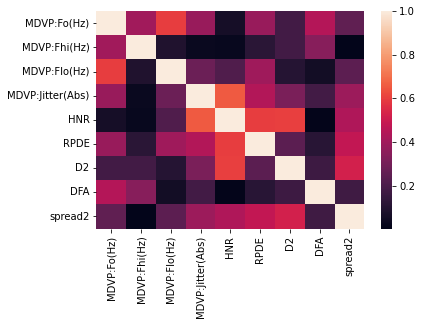

In [59]:
df_selection = df_selection.loc[:, df_selection.columns != 'MDVP:APQ']
c = df_selection.corr().abs()
sns.heatmap(c)

In [64]:
# store target variable y
y = df.status.values

# create feature matrix
X = np.array(df_selection) # these are the features (matrix)
X.shape

(195, 9)

## Prepare the Data

In [ ]:
# Normalize the data
def normalize(X):
    scaler = StandardScaler()
    scaler = scaler.fit(X)
    X = scaler.transform(X)
    return X

X = normalize(X)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

## Try models